In [108]:
import matplotlib.pyplot as plt
import numpy as np

In [109]:
def fForcas(L,N,x,y,epsilon,sigma):
    Fx=np.zeros(N)
    Fy=np.zeros(N)
    # considerar todos pares de particulas
    Epn=0
    for i in range(N-1):
        for j in range(i+1,N):
            rij=[x[i]-x[j],y[i]-y[j]]
            # condicoes fronteira periodicas
            # consideramos a interação com a imagem mais proxima 
            # da particula j
            if rij[0] >=L/2:
                rij[0]=rij[0]-L;                # xij relativo à imagem mais proxima da particula j
            if rij[1] >=L/2:
                rij[1]=rij[1]-L
            if rij[0] <=-L/2:
                rij[0]=rij[0]+L
            if rij[1] <=-L/2:
                rij[1]=rij[1]+L
            
            dij=np.linalg.norm(rij)/sigma             # distancia
            Fij=48*epsilon*sigma*(dij**(-13)-0.5*dij**(-7))   # modulo
            Fx[i]=Fx[i]+Fij*rij[0]/dij 
            Fy[i]=Fy[i]+Fij*rij[1]/dij
            Fx[j]=Fx[j]-Fij*rij[0]/dij 
            Fy[j]=Fy[j]-Fij*rij[1]/dij
            Epn=Epn+4*epsilon*(dij**(-12)-dij**(-6))
    return (Fx,Fy,Epn)

In [110]:
def fgraf(x,y,L,px,py): # objetivo da função é fazer um gráfico
    ret1=[0,L,L,0,0]
    ret2=[0,0,L,L,0]
    plt.plot(x,y,'o', ret1,ret2,'k-')
    plt.quiver(x,y,px,py,color='r')
    plt.axis([-0.5, L+0.5,-0.5,L+0.5])
    plt.pause(0.001)

In [111]:
def leapfrog(L,N,npassos, dt, x, y, px, py,epsilon,sigma,m):
    Ec = np.zeros(npassos)
    Ep = np.zeros(npassos)
    for n in range(npassos):
        Fx,Fy,Epi = fForcas(L,N,x,y,epsilon,sigma)
        x = x+dt*px + 0.5*dt**2*Fx
        y = y+dt*py + 0.5*dt**2*Fy
        # condições fronteira periodicas
        # as que saem por uma parede da caixa entram pela parede oposta.
        for i in range(len(x)):
            if x[i]>L:
                x[i]-=L
            if x[i]<0:
                x[i]+=L
        for i in range(len(y)):
            if y[i]>L:
                y[i]-=L
            if y[i]<0:
                y[i]+=L  
    
        # novas Forcas
        Flx,Fly, Epn = fForcas(L,N,x,y,epsilon,sigma)
        px = px+0.5*dt*(Flx+Fx)
        py = py+0.5*dt*(Fly+Fy)
        # if n%100==0:
        #     fgraf(x,y,L,px,py)
        Ec[n] = 0.5*m*np.sum(px**2+py**2)
        Ep[n] = Epn

    return (x,y,px,py,Ec,Ep)

In [112]:
## ex25

N = 12          # n particulas
epsilon = 1     # nao dado
sigma = 1       # nao dado
m = 1           # nao dado

L = 12*sigma
dt = 0.01 * np.sqrt(m/epsilon)

x = L/2*np.ones(N); # posição inicial das particulas (meio da caixa)
y = np.linspace(sigma/2,L-sigma/2,N);  # sigma é a distancia entre os centros das particulas
px = 1/np.sqrt(epsilon*m)*np.ones(N)
py = np.zeros(N)

1 1000 passos 

Inversão das velocidades --> +1000 passos 

Adicionamos perturbação à velocidade da particula 2 - + 1000 passos 

Inversão das velocidades --> + 2000 passos 



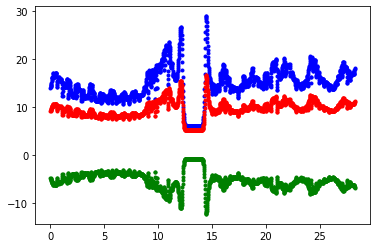

In [113]:
npassos=1000
print(1,'1000 passos \n')
x,y,px,py,Ec,Ep=leapfrog(L,N,npassos, dt, x, y, px, py,epsilon,sigma,m)

px=-px
py=-py
print('Inversão das velocidades --> +1000 passos \n')
x,y,px,py,Ec,Ep=leapfrog(L,N,npassos, dt, x, y, px, py,epsilon,sigma,m)

# perturbação ligeira da particula 2
px[1]=px[1]+1e-6*(2*np.random.rand(1)-1)
py[1]=py[1]+1e-6*(2*np.random.rand(1)-1)
npassos=1000
print('Adicionamos perturbação à velocidade da particula 2 - + 1000 passos \n')
[x,y,px,py,Ec,Ep]=leapfrog(L,N,npassos, dt, x, y, px, py,epsilon,sigma,m)

px=-px
py=-py
print('Inversão das velocidades --> + 2000 passos \n')
npassos=2000
x,y,px,py,Ec,Ep=leapfrog(L,N,npassos, dt, x, y, px, py,epsilon,sigma,m)

plt.figure(2)
# plot das energias --> cinética, potencial e total
t=np.arange(0,npassos*dt,dt)
plt.plot(t,Ec,'b.')
plt.plot(t,Ep,'g.')
plt.plot(t,Ec+Ep,'r.')
plt.show()